# TED Talk Recommendation System

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
import warnings
from scipy.stats import pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Legion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.read_csv('tedx_dataset.csv')
data.head()

,idx,main_speaker,title,details,posted,url,num_views
0,8d2005ec35280deb6a438dc87b225f89,Alexandra Auer,The intangible effects of walls,More barriers exist now than at the end of Wor...,Posted Apr 2020,https://www.ted.com/talks/alexandra_auer_the_i...,NaN
1,b3072cd11f40eb57fd259555264476c6,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...,If you're feeling anxious or fearful during th...,Posted Apr 2020,https://www.ted.com/talks/elizabeth_gilbert_it...,NaN
2,4adc9fee977fa04c357ed4c9b52aa3cc,Butterscotch,"""Accept Who I Am""","Firing off her formidable beatboxing skills, m...",Posted Apr 2020,https://www.ted.com/talks/butterscotch_accept_...,0.0
3,59c641a72b495d522a7932145d6c02b3,Ethan Lisi,What it's really like to have autism,"""Autism is not a disease; it's just another wa...",Posted Apr 2020,https://www.ted.com/talks/ethan_lisi_what_it_s...,NaN
4,d227f2faf6ec185e54436d86463f499b,Daniel Finkel,Can you solve the sea monster riddle?,"According to legend, once every thousand years...",Posted Apr 2020,https://www.ted.com/talks/daniel_finkel_can_yo...,0.0


In [9]:
data.shape

(4467, 7)

In [11]:
data.isnull().sum()

idx                0
main_speaker       1
title              0
details            0
posted             0
url                0
num_views       4258
dtype: int64

In [17]:
split_date = data['posted'].str.split(' ', expand = True)
data['year'] = split_date[2].astype('int')
data['month'] = split_date[1]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idx           4467 non-null   object 
 1   main_speaker  4466 non-null   object 
 2   title         4467 non-null   object 
 3   details       4467 non-null   object 
 4   posted        4467 non-null   object 
 5   url           4467 non-null   object 
 6   num_views     209 non-null    float64
 7   year          4467 non-null   int32  
 8   month         4467 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 296.8+ KB


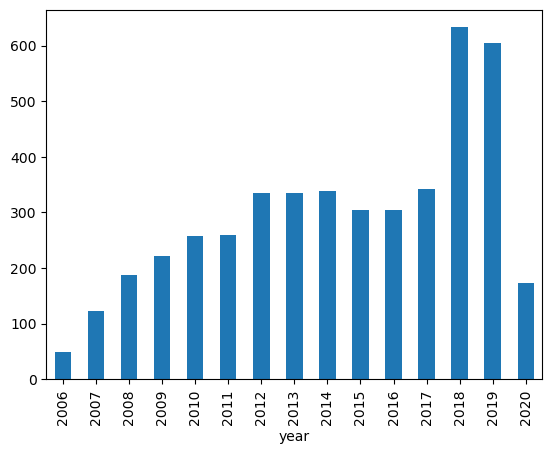

In [33]:
data['year'].value_counts().sort_index().plot(kind ='bar')
plt.show()

In [35]:
data['detials'] = data['title'] + ' ' + data['details']

data = data[['main_speaker', 'details']]
data.dropna(inplace = True)
data.head()

,main_speaker,details
0,Alexandra Auer,More barriers exist now than at the end of Wor...
1,Elizabeth Gilbert,If you're feeling anxious or fearful during th...
2,Butterscotch,"Firing off her formidable beatboxing skills, m..."
3,Ethan Lisi,"""Autism is not a disease; it's just another wa..."
4,Daniel Finkel,"According to legend, once every thousand years..."


In [37]:
data.isnull().sum()

main_speaker    0
details         0
dtype: int64

In [39]:
df = data.copy()

## Text Processsing

In [46]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []
    
    for words in str(text).split():
        words = words.lower()
    
        if words not in stop_words:
            imp_words.append(words)

    output = " ".join(imp_words)

    return output

In [48]:
data['details'] = data['details'].apply(lambda text: remove_stopwords(text))
data.head()

,main_speaker,details
0,Alexandra Auer,"barriers exist end world war ii, says designer..."
1,Elizabeth Gilbert,"feeling anxious fearful coronavirus pandemic, ..."
2,Butterscotch,"firing formidable beatboxing skills, musician ..."
3,Ethan Lisi,"""autism disease; another way thinking,"" says e..."
4,Daniel Finkel,"according legend, every thousand years host se..."


In [54]:
def remove_punctuations(text):
    punctuation_list = string.punctuation
    signal = str.maketrans('','', punctuation_list)
    return text.translate(signal)

data['details'] = data['details'].apply(lambda x: remove_punctuations(x))
data.head()

,main_speaker,details
0,Alexandra Auer,barriers exist end world war ii says designer ...
1,Elizabeth Gilbert,feeling anxious fearful coronavirus pandemic a...
2,Butterscotch,firing formidable beatboxing skills musician b...
3,Ethan Lisi,autism disease another way thinking says ethan...
4,Daniel Finkel,according legend every thousand years host sea...


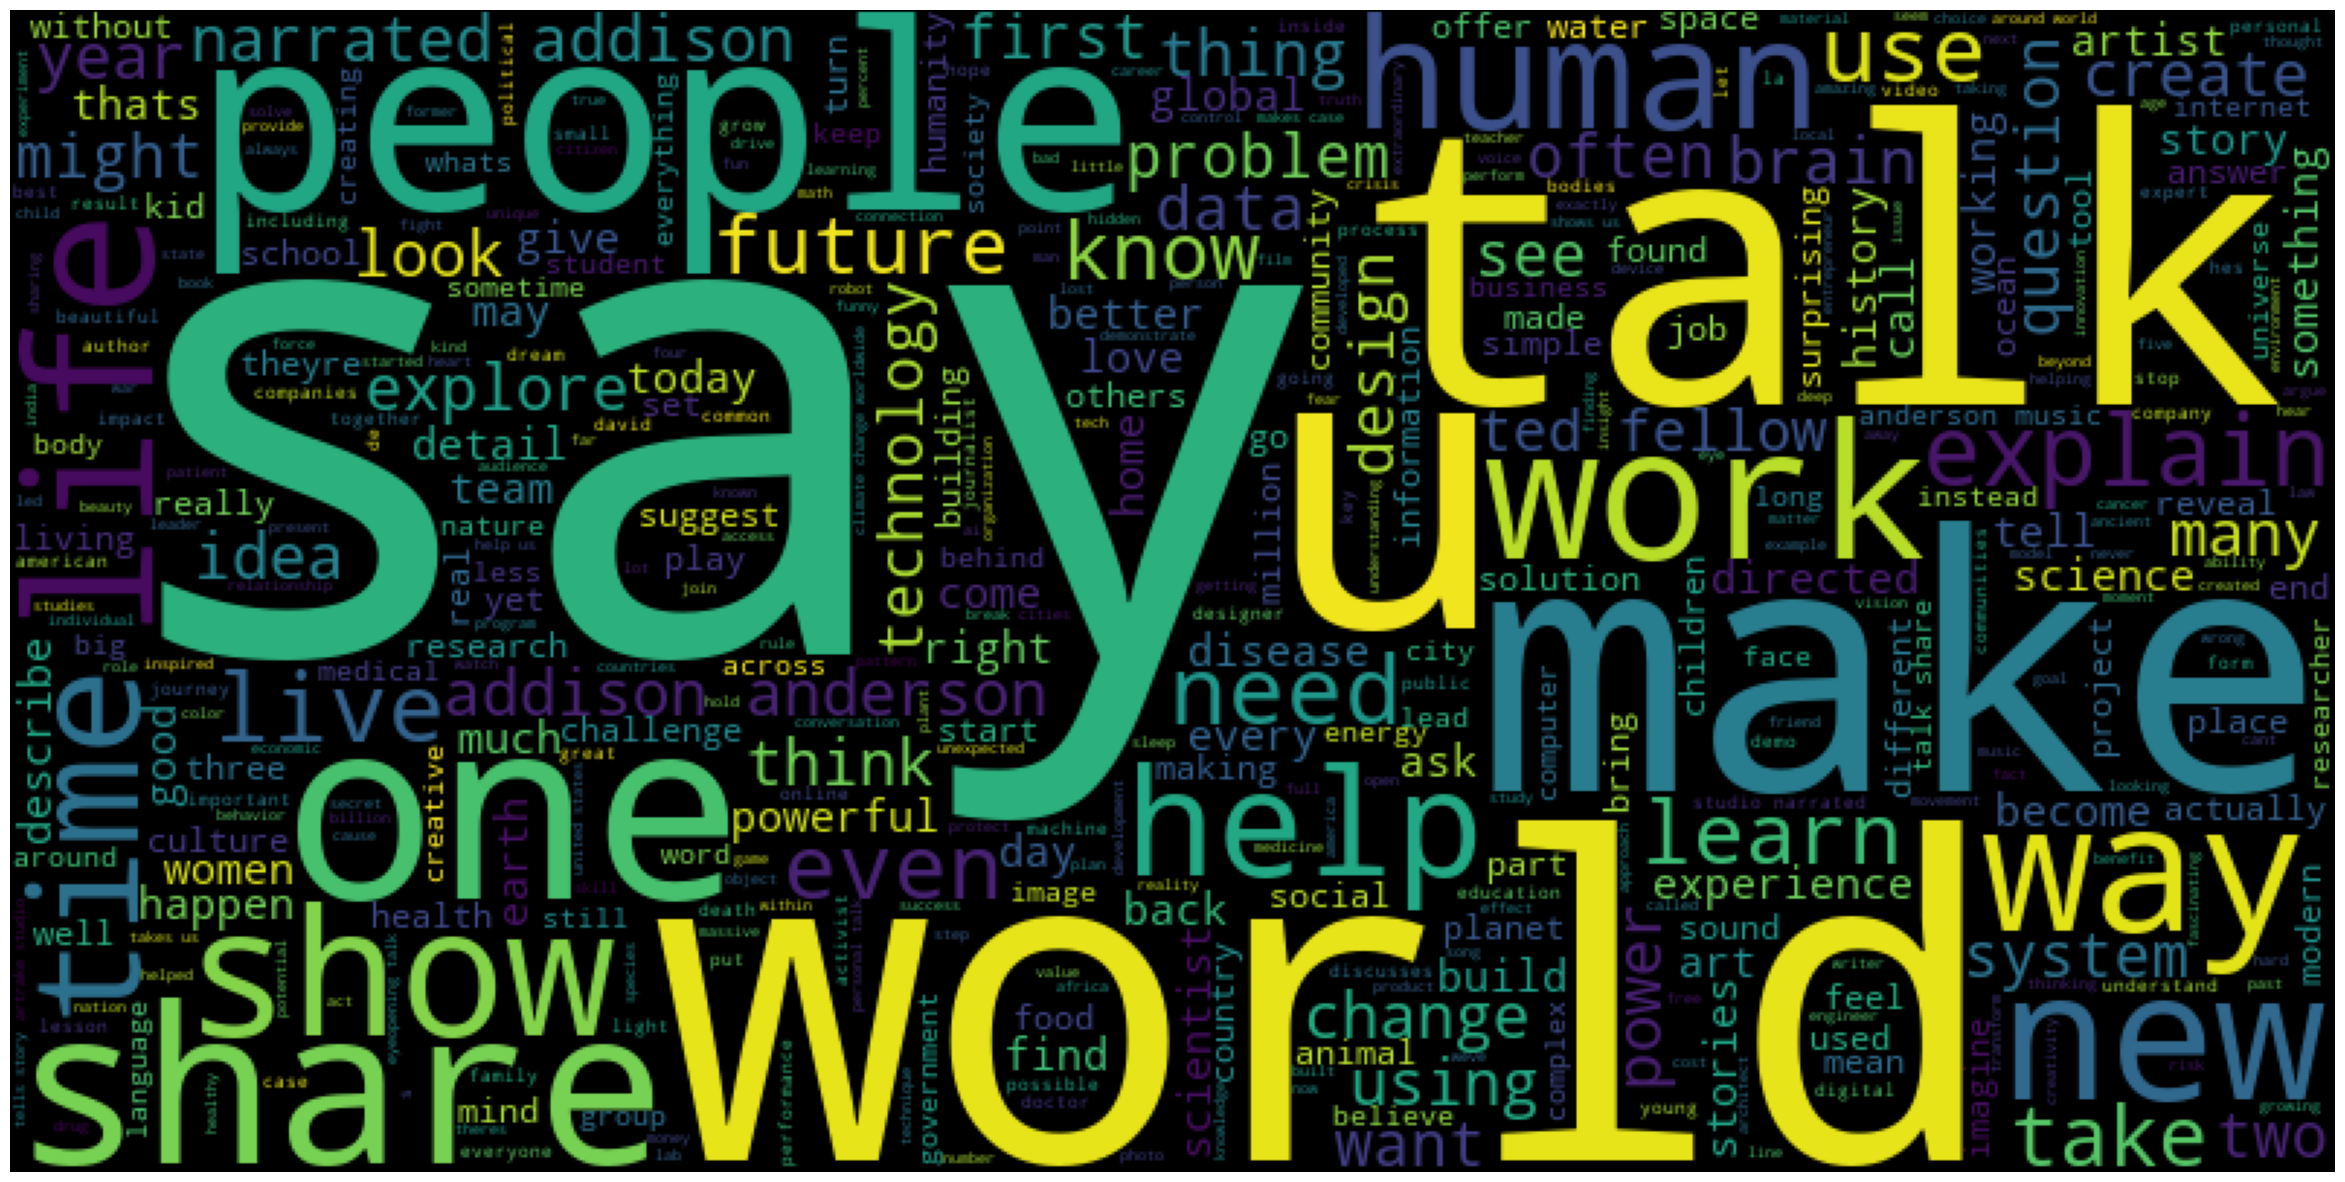

In [57]:
det_corp = " ".join(data['details'])

plt.figure(figsize=(30,30))
wc = WordCloud(max_words = 1000, width = 800, height = 400).generate(det_corp)
plt.axis('off')
plt.imshow(wc)
plt.show()

## Recommendation System

### Indicators Use:

***1.Cosine Similarity***

***2.Pearson Correlation***